# Linge & Langtagen, "Programming for Computations"
## Ch. 3.2 The composite trapzoidal rule

The integral $\int_a^b f(x) dx $ may be interpreted as the area between the $x$ axis and the graph $y = f(x)$ of the integrand.

Computing the integral $\int_0^1 f(t)dt$ amounts to computing the area of the hatched region.

Let see the example again, we set the $f(t)$ 

$$f(t) = 3t^2e^{t^3}$$

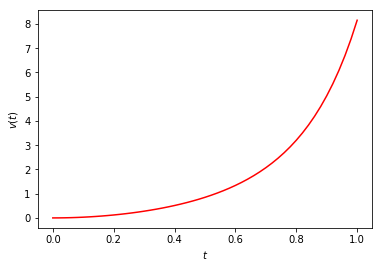

In [9]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,1,51)
y = 3*t**2*np.exp(t**3)

plt.plot(t,y, 'r-')
plt.xlabel('$t$')
plt.ylabel('$v(t)$')
plt.show()

If we $replace$ the true graph above by a set of straigh line segments, 

we may view the area rather as composed of $trapezoids$, the areas of wihch are easy to compute.

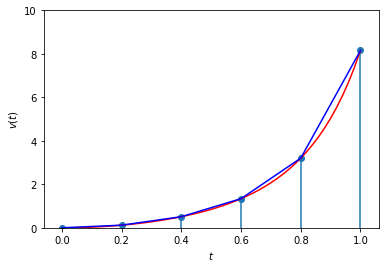

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll

t1 = np.linspace(0,1,51)
y1 = 3*t1**2*np.exp(t1**3)

t2 = np.linspace(0,1,6)
y2 = 3*t2**2*np.exp(t2**3)

x_set = []
y_set = []
x_set.append(t2)
y_set.append(y2)

V_lines = []
for i in range(6):
    pair=[(x_set[0][i],0),(x_set[0][i],y_set[0][i])]
    V_lines.append(pair)

linecoll = matcoll.LineCollection(V_lines)
fig, ax = plt.subplots()
ax.add_collection(linecoll)

plt.plot(t1,y1, 'r-')
plt.plot(t2,y2, 'b-')
plt.scatter(x_set[0],y_set[0])
plt.xlabel('$t$')
plt.ylabel('$v(t)$')
plt.ylim(0,10)

plt.show()

The areas of the 5 trapezoids shown in above figure ($cf.$ the textbook Figure 3.2 shows 4 trapezoids example), now we consititue our approximation to the integral.

$$\int_0^1v(t)dt \approx h_1(\frac{v(0) + v(0.2)}{2})+h_2(\frac{v(0.2) + v(0.4)}{2})+h_3(\frac{v(0.4) + v(0.6)}{2})+h_4(\frac{v(0.6) + v(0.8)}{2})+h_5(\frac{v(0.8) + v(1.0)}{2})$$

where
$$h_1=h_2=h_3=h_4=h_5=0.2$$

with $v(t) = 3t^2e^{t^3}$, each term in $h_n(v(t))$ is readily computed and our approximate computation gives

In [11]:
import numpy as np

# x-axis points
x = []
t = np.linspace(0,1,6)

for i in range(len(t)):
    x.append(t[i])

# interval 
h = ((float(t[-1])-float(t[0]))/(len(t)-1))

# function
y = lambda t: 3*t**2*np.exp(t**3)

sum = 0
for i in range(len(x)-1):
    a = 0.5*(y(x[i])+y(x[i+1]))
    sum += h*a

print("::: The 5 trapezoids result :::")
print(sum)

::: The 5 trapezoids result :::
1.850852345028698


Compared to the true answer of 1.718, this is off by about 7.18%. However, note that we used just 5 trapezoids to approximate the area.

With more trapezoids, the approximation would have become better, since the straigh line segm,ents in the upper trapezoid side then would follow the graph more closely.

Doing another hand calculation with more trapezoids is not too tempting for a lazy human, though, but it is a perfect job for a computer!

Let us therefore derive the expressions for approximating the integral by an arbitary number of trapezoids.

### Ch. 3.2.1 The general formula

For a given function $f(x)$, wee want to approximate the integral $\int_a^bf(x)dx$ by $n$ trapezoids (of equal width).

We start out with above results and approximate each integral on the right hand side with a single trapezoid. In detail,

$$\int_a^bf(x)dx = \int_{x_0}^{x_1}f(x)dx + \int_{x_1}^{x_2}f(x)dx + \ldots + \int_{x_{n-1}}^{x_n}f(x)dx,$$


$$\approx h(\frac{f(x_{0}) + f(x_{1})}{2}) + h(\frac{f(x_{1}) + f(x_{2})}{2}) + \ldots + h(\frac{f(x_{n-1}) + f(x_{n})}{2}) $$

By simplifying the right hand side of trapezoidal figure we get

$$\int_a^bf(x)dx \approx \frac{h}{2}[f(x_{0}) + 2f(x_{1}) + 2f(x_{2})+ \ldots + 2f(x_{n-1}) + f(x_{n})] $$

which is more compactly written as

$$\int_a^bf(x)dx \approx h[\frac{1}{2}f(x_{0}) + \sum_{i=1}^{n-1}f(x_{i}) + \frac{1}{2}f(x_{n})]$$

### Ch. 3.2.2 Implementation

Implementation with functions.

For the integral $\int_a^bf(x)dx$ computed by the formula (3.17) in textbook, we want the corresponding Python function $trapezoid$ to take any $f$, $a$, $b$ and $n$ as input and return the approximation to the integral.

We write a Python function $trapezoidal$ in a file $trapezoidal.py$ as close as possible to the formula above, making sure variable names correspond to the mathematical notation.

Solving our specific problem in a session.

In [12]:
import numpy as np

def trapezoidal(f, a, b, n):
    h = float(b-a)/n
    result = 0.5*f(a) + 0.5*f(b)
    for i in range(1, n):
        result += f(a + i*h)
    result *= h
    return result

# Solving our specific problem

v = lambda t : 3*(t**2)*np.exp(t**3)
n = 4                                   #### try a larger n ###
print("::: The number of points :::")
print("n =", n)
print("-----------------------------")

numerical = trapezoidal(v, 0, 1, n)
print("::: Nunmerical :::")
print(numerical)
print("-----------------------------")

V = lambda t: np.exp(t**3)
exact = V(1) - V(0)
print("::: Exact :::")
print(exact)
print("-----------------------------")

difference = exact - numerical
print("::: Error :::")
print(difference)
print("-----------------------------")

::: The number of points :::
n = 4
-----------------------------
::: Nunmerical :::
1.9227167504675762
-----------------------------
::: Exact :::
1.718281828459045
-----------------------------
::: Error :::
-0.20443492200853108
-----------------------------


### Ch. 3.2.3 Making a module

When we have the different pieces of our program as a collection of functions, it is very straighforward to create a $module$ that can be imported in othre programs.

That is, having our code as a module, means that the $trapezoidal$ function can easily be reused by other programs to solve other problems.


In [13]:
from trapezoidal_with_application import trapezoidal, application

if __name__ == '__main__':
    print("Put the number of points")
    application()

Put the number of points


n:   450


n=   450:   1.7182986079226454, error:   -1.67795e-05


### Ch. 3.2.4 Alternative flat special-purpose implementation

Let us illustrate the implementation implied by alternative 1 in the $Programmer's$ $dilemma$ $box$ in textbook Section 3.2.2. 

That is, we make a special-purpose code where we adapt the general formula to the specific problem $\int_0^13t^2e^{t^{3}}dt$.

Basically, we use a for loop to compute the sum. Each term with $f(x)$ in the formula (3.17) in textbook is replaced by $3t^2e^{t^{3}}$, $x$ by $t$, and $h$ by $\Delta t$.

A first try at writing a plain, flat program doing the special calculation is

In [14]:
from math import exp

a = 0.0 ; b = 1.0
n = input('n: ')
dt = float(b - a) / int(n)

# Integral by the trapezoidal method
numerical = 0.5*3*(a**2)*exp(a**3) + 0.5*3*(b**2)*exp(b**3)
for i in range(1, int(n)):
    numerical += 3*((a + i*dt)**2)*exp((a + i*dt)**3)
numerical *= dt

exact_value = exp(1**3) - exp(0**3)
error = abs(exact_value - numerical)
rel_error = (error/exact_value)*100
print('n=%d: %.16f, error: %g' % (int(n), numerical, error))

n:  450


n=450: 1.7182986079226454, error: 1.67795e-05


The problem with the above code is at least three-fold:
    
1. We need to reformulate (3.17) in textbook for our special problem withj a different notation.
2. The integrand $3t^2e^t{^3}$ is inserted many times in the code, which quickly leads to erros.
3. A lot of edits are necessary to use the code to compute a different integral - these edits are likely to introduce erros.

The Potential errors involved in point 2 serve to illustrate how important it is to use Python functions as mathematical functions.

Here we have chosen to use the lambda function to define the integrand as the virable v:

In [15]:
from math import exp

v = lambda t: 3*(t**2)*exp(t**3) # Function to be integrated
a = 0.0 ; b = 1.0
n = input('n: ')
dt = float(b - a) / int(n)

# Integral by the trapezoidal method
numerical = 0.5*v(a) + 0.5*v(b)
for i in range(1, int(n)):
    numerical += v(a + i*dt)
numerical *= dt

F = lambda t: exp(t**3)
exact_value = F(b) - F(a)
error = abs(exact_value - numerical)
rel_error = (error/exact_value)*100
print('n=%d: %.16f, error: %g' % (int(n), numerical, error))

n:  450


n=450: 1.7182986079226454, error: 1.67795e-05


Unfortunately, the two other probelms remain and they are fundamental.

Suppose you want to compute another integral, say $\int_{-1}^{1.1}e^{-x^{2}}dx$. How much do we need to change in the previous code to compute the new integral?

Not so much:

$\diamond$ the formula for $v$ must be replaced by a new formula

$\diamond$ the limits $a$ and $b$

$\diamond$ the anti-derivative $V$ is not easily known and can be omitted, and therefore we cannot write out the error

$\diamond$ the notation should be changed to be alighned with the new problem, i.e., $t$ and $dt$ changed to $x$ and $h$


With the previous code in $trapezoidal.py$, we can compute the new integral $\int_{-1}^{1.1}e^{-x^{2}}dx$ $without$ $touching$ $the$ $mathematical$ $algorithm$. 

In [16]:
from trapezoidal import trapezoidal
from math import exp
val = trapezoidal(lambda x: exp(-x**2), -1, 1.1, 400)

print(val)

1.5268823686123285


When you now loock back at the two solutions, the flat special-purpose program and the function-based program with the general-purpose function $trapezoidal$,

you hopefully realize that $implementing$ $a$ $gneral$ $mathematical$ $algorithm$ $in$ $a$ $general$ $function$ requires somewhat more abstract thinking, but the resulting code can be used over and over again.